### IIR_Testfilter

In this example I want to try to simulate an IIR filter in Python. This should help me to design IIR filters with migen and later with nmigen. <br> Why should that help me? <br> I want to test fixed point calculations here, which should then be used in migen and nmigen. <br> The first part of code is just making an IIR Filter running.

Filter Coefs: coefa and coefb:
[ 1.         -1.9962976   0.99630444] [1.71030589e-06 3.42061178e-06 1.71030589e-06]


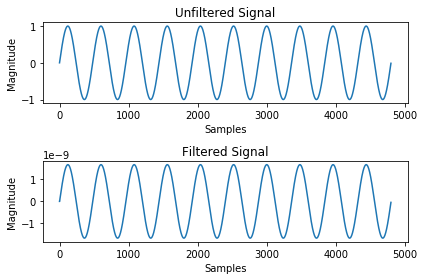

In [3]:
import matplotlib.pyplot as plt #For plotting
from math import sin, pi #For generating input signals
import scipy.signal as sig
import numpy as np

### Filter - 6KHz->8Khz Bandpass Filter
### @param [in] input - input unfiltered signal
### @param [out] output - output filtered signal
def filter(x , coefb, coefa):
    y = [0]*48000
    for n in range(3, len(x)):
        y[n] = (coefb[0]*x[n] + coefb[1]*x[n-1]+  coefb[2]*x[n-2] -(coefa[1]*y[n-1] + coefa[2]*y[n-2]))/(2**Exp)
    return y

###Read in desired frequency from command line
#frequency = int(sys.argv[1])
frequency = 100

## Create the filter
Fs = 48000           #Sample Frequ
sample = 48000       #Number of Samples
f = 100             #Sig gen Frequ
n = 2               #Order of Filter
rs = 30             #only for Cheby
fc = 20            #Cut Frequ
w_c = 2*fc/Fs       #Digital Frequ -> 0 - 0.5
Exp = 12
[coefb,coefa] = sig.iirfilter(n,w_c ,0,rs, btype="lowpass", analog=False, ftype="butter")
print("Filter Coefs: coefa and coefb:")
print(coefa,coefb)


### Create empty arrays
input = [0]*48000
output = [0]*48000

### Fill array with xxxHz signal
for i in range(48000):
    input[i] = sin(2 * pi * frequency * i / 48000) #+ sin(2 * pi * 70 * i / 48000)

### Run the signal through the filter
output = filter(input,coefb,coefa)

### Grab samples from input and output
output_section = output[0:4800]
input_section = input[0:4800]

### Plot the signals for comparison
plt.figure(1)
plt.subplot(211)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Unfiltered Signal')
plt.plot(input_section)
plt.subplot(212)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Filtered Signal')
plt.plot(output_section)
plt.tight_layout()
plt.show()


Here it is easy to see that a IIR Filter does a pretty awesome Job. <br> A 100Hz signal which is given to a second order IIR filter with a cutoff frequency of 20 Hz is cuted down to a Amplitude with the size of 1*10^-7.


In the next example I try to change this code to see how bad the result gets when I sample with 20 bits.<br>
I try manually to avoid an overflow which is easy because I work with 32 bit Integers.<br>
So basically I multiply my code with a factor and compare the floatingpoint results from above with the fixpoint results.<br>
In the following code I use a Faktor of 20.<br>
Why 20?<br>
Because the smallest number is 1.71030589e-06.<br>
To scale this number at least to 1 I need a Exp of 20. <br>
If I would fall below this some factors of the coefb will be 0 wich will result in worse results.<br>


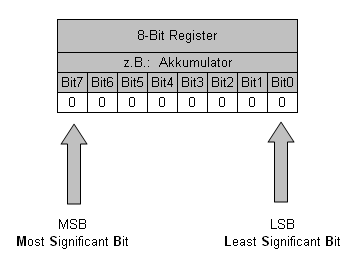

In [4]:
from IPython.display import Image
Image("img/SB_LSB_8bit.gif")

old coefa and coefb:
[ 1.         -1.9962976   0.99630444] [1.71030589e-06 3.42061178e-06 1.71030589e-06]
new coefa and coefb:
[ 1048576. -2093269.  1044700.] [1. 3. 1.]
<class 'numpy.int32'>
-0b111111111000011010101


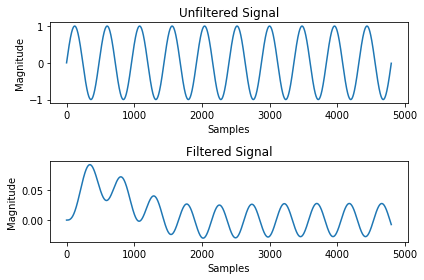

In [7]:
import matplotlib.pyplot as plt #For plotting
from math import sin, pi #For generating input signals
import scipy.signal as sig
import numpy as np

### Filter - 6KHz->8Khz Bandpass Filter
### @param [in] input - input unfiltered signal
### @param [out] output - output filtered signal
def filter(x , coefb, coefa):
    y = [0]*48000
    for n in range(3, len(x)):
        y[n] = (coefb[0]*x[n] + coefb[1]*x[n-1]+  coefb[2]*x[n-2] -(coefa[1]*y[n-1] + coefa[2]*y[n-2]))/(2**Exp)
    return y

###Read in desired frequency from command line
#frequency = int(sys.argv[1])
frequency = 100

## Create the filter
Fs = 48000           #Sample Frequ
sample = 48000       #Number of Samples
f = 100             #Sig gen Frequ
n = 2               #Order of Filter
rs = 30             #only for Cheby
fc = 20            #Cut Frequ
w_c = 2*fc/Fs       #Digital Frequ -> 0 - 0.5
Exp = 20
[coefb,coefa] = sig.iirfilter(n,w_c ,0,rs, btype="lowpass", analog=False, ftype="butter")

###Used to do test for the needed Exponent
print("old coefa and coefb:")
print(coefa,coefb)
i=0
for c in coefa:
    coefa[i] = np.int(coefa[i]*2**Exp)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    i=i+1
i=0
for c in coefb:
    coefb[i] = int(coefb[i]*2**Exp)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    i=i+1
print("new coefa and coefb:")
print(coefa,coefb)
coefa = coefa.astype('int32')
print(type(coefa[0]))
print(bin(coefa[1]))
###########################################


### Create empty arrays
input = [0]*48000
output = [0]*48000

### Fill array with xxxHz signal
for i in range(48000):
    input[i] = sin(2 * pi * frequency * i / 48000) #+ sin(2 * pi * 70 * i / 48000)

### Run the signal through the filter
output = filter(input,coefb,coefa)

### Grab samples from input and output 
output_section = output[0:4800]
input_section = input[0:4800]

### Plot the signals for comparison
plt.figure(1)
plt.subplot(211)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Unfiltered Signal')
plt.plot(input_section)
plt.subplot(212)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Filtered Signal')
plt.plot(output_section)
plt.tight_layout()
plt.show()


The next step is not to make the whole Internal working part of my "Filter" ready for the Fixpoint calc.<br>
Therefore I scale the input Signal with the same factor then the coeficients. <br>
I implement the type conversions to int 32 and at the End a recalculation to a float for the comparison.<br>


[ 1.         -1.9962976   0.99630444] [1.71030589e-06 3.42061178e-06 1.71030589e-06]
[ 1048576 -2093269  1044700]
[1 3 1]


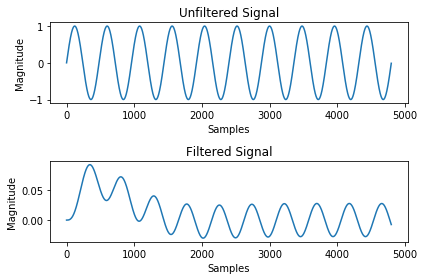

In [8]:
import matplotlib.pyplot as plt #For plotting
from math import sin, pi #For generating input signals
import scipy.signal as sig
import numpy as np

### Filter - 6KHz->8Khz Bandpass Filter
### @param [in] input - input unfiltered signal
### @param [out] output - output filtered signal
def filter(x , coefb, coefa):
    y = [0]*48000
    for n in range(0, len(x)):
        y[n] = coefa[0]*y[n]/(2**Exp)
        for m in range(len(coefb)):
            y[n] = y[n] +  (coefb[m]*x[n-m] -(coefa[m]*y[n-m]))/(2**Exp)
        #y[n] = (coefb[0]*x[n] + coefb[1]*x[n-1]+  coefb[2]*x[n-2] -(coefa[1]*y[n-1] + coefa[2]*y[n-2]))/(2**Exp)
    return y

###Read in desired frequency from command line
#frequency = int(sys.argv[1])
frequency = 100

## Create the filter
Fs = 48000           #Sample Frequ
samples = 48000       #Number of Samples
f = 100             #Sig gen Frequ
n = 2               #Order of Filter
rs = 30             #only for Cheby
fc = 20            #Cut Frequ
w_c = 2*fc/Fs       #Digital Frequ -> 0 - 0.5
Exp = 20
Type = 'int32'      #Type of the internal calc

[coefb,coefa] = sig.iirfilter(n,w_c ,0,rs, btype="lowpass", analog=False, ftype="butter")

###Used to do test for the needed Exponent
print(coefa,coefb)
i=0
for c in coefa:
    coefa[i] = np.int(coefa[i]*2**Exp)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    i=i+1
coefa = coefa.astype(Type)
print(coefa)
i=0
for c in coefb:
    coefb[i] = int(coefb[i]*2**Exp)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    i=i+1
coefb = coefb.astype(Type)
print(coefb)
###########################################


### Create empty arrays
input = [0]*samples
output = [0]*samples

### Fill array with xxxHz signal
for i in range(samples):
    input[i] = int((2**Exp)*sin(2 * pi * frequency * i / samples)) #+ sin(2 * pi * 70 * i / 48000)
      #Scale the input with 2**Exp

### Run the signal through the filter
output = filter(input,coefb,coefa)

### Grab samples from input and output 
output_section = output[0:4800]
output_section = [i / (2**Exp) for i in output_section]
input_section = input[0:4800]
input_section = [i / (2**Exp) for i in input_section]

### Plot the signals for comparison
plt.figure(1)
plt.subplot(211)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Unfiltered Signal')
plt.plot(input_section)
plt.subplot(212)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Filtered Signal')
plt.plot(output_section)
plt.tight_layout()
plt.show()


In the next step I try do implenent a automatized coef scaler, which always trys to choose the lowest possible amount of bits necessary to make the system working. <br>
I also try to improve the legibility of the code a little by defining functions and calling them later instead of using them directly.

Expmin = 
 20
None
Expmax = 
 30
None
[ 1.         -1.9962976   0.99630444] [1.71030589e-06 3.42061178e-06 1.71030589e-06]
[ 1048576 -2093269  1044700]
[1 3 1]


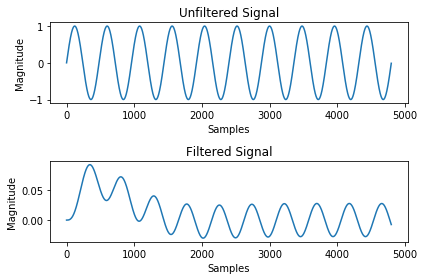

In [1]:
import matplotlib.pyplot as plt #For plotting
from math import sin, pi #For generating input signals
import scipy.signal as sig
import numpy as np
import math

### Filter - 6KHz->8Khz Bandpass Filter
### @param [in] input - input unfiltered signal
### @param [out] output - output filtered signal
def filter(x , coefb, coefa,Exponent):
    y = [0]*48000
    for n in range(0, len(x)):
        y[n] = coefa[0]*y[n]/(2**Exponent)
        for m in range(len(coefb)):
            y[n] = y[n] +  (coefb[m]*x[n-m] -(coefa[m]*y[n-m]))/(2**Exponent)
        #y[n] = (coefb[0]*x[n] + coefb[1]*x[n-1]+  coefb[2]*x[n-2] -(coefa[1]*y[n-1] + coefa[2]*y[n-2]))/(2**Exponent)
    return y

###Read in desired frequency from command line
#frequency = int(sys.argv[1])
frequency = 100

## Create the filter
Fs = 48000           #Sample Frequ
samples = 48000       #Number of Samples
f = 100             #Sig gen Frequ
n = 2               #Order of Filter
rs = 30             #only for Cheby
fc = 20            #Cut Frequ
w_c = 2*fc/Fs       #Digital Frequ -> 0 - 0.5
#Exp = 20
Type = "int32"      #Type of the internal calc

###Find the smallest possible Exponent out of coefa and coefb ###########
def minExp (lista,listb,maxsize):
    if maxsize == "int16":
        maxsize = 16
    elif maxsize == "int32":
        maxsize = 32
    elif maxsize == "int64":
        maxsize = 64
    else:
        raise TypeError("The Exponent must be an Integer")
    lista =  [abs(ele) for ele in lista]                            #Generates a List of absolute Values
    listb =  [abs(ele) for ele in listb]                            #Generates a List of absolute Values
    minall = min(min(lista), min(listb))                            #find the minimum of the two new lists
    maxall = max(max(lista), max(listb))                            #find the maximum of the two new lists
    Expmin = int(round(0.49 + math.log(1/minall, 2)))               #find the minimum Exponent
    Expmax = int(round(math.log((2**(maxsize-1))/maxall, 2)))       #find the maximum Exponent
    print(print("Expmin = \n", Expmin))
    print(print("Expmax = \n", Expmax))
    if Expmin > Expmax:
        raise OverflowError("Filter is not possible, enlarge the internal Register or define the specs in another way")
    return Expmin,Expmax                                            #return this two found Exponents
#########################################################################

###Used to do test for the needed Exponent##############################
def Multiplyer (coefa,coefb,Exponent):
    print(coefa,coefb)
    for c in range(len(coefa)):
        coefa[c] = np.int(coefa[c]*2**Exponent)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    coefa = coefa.astype(Type)
    print(coefa)
    for c in range(len(coefb)):
        coefb[c] = int(coefb[c]*2**Exponent)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    coefb = coefb.astype(Type)
    print(coefb)
    return coefa,coefb
########################################################################


[coefb,coefa] = sig.iirfilter(n,w_c ,0,rs, btype="lowpass", analog=False, ftype="butter")
Expmin,Expmax = minExp(coefa,coefb,Type)
[coefa,coefb] = Multiplyer(coefa,coefb,Expmin)





### Create empty arrays
input = [0]*samples
output = [0]*samples

### Fill array with xxxHz signal
for i in range(samples):
    input[i] = int((2**Expmin)*sin(2 * pi * frequency * i / samples)) #+ sin(2 * pi * 70 * i / 48000)
      #Scale the input with 2**Exp

### Run the signal through the filter

output = filter(input,coefb,coefa,Expmin)

### Grab samples from input and output 
output_section = output[0:4800]
output_section = [i / (2**Expmin) for i in output_section]
input_section = input[0:4800]
input_section = [i / (2**Expmin) for i in input_section]

### Plot the signals for comparison
plt.figure(1)
plt.subplot(211)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Unfiltered Signal')
plt.plot(input_section)
plt.subplot(212)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Filtered Signal')
plt.plot(output_section)
plt.tight_layout()
plt.show()


The new function "minExp" takes coefa and coefb as well as the maximum integer number which the given device is able to take.<br>
The absolute minimum and the absolute maximum of both lists are searched for and adapted to the given maximum word size.<br>
Finally, it is checked whether the maximum possible word width exceeds the minimum possible word width, which would lead to an error.<br>
If this is the case, an error is thrown.

I try to show the effect of the Filter in a better way. <br>
Therefore I use the chirp function.

Expmin = 
 20
None
Expmax = 
 30
None
[ 1.         -1.9962976   0.99630444] [1.71030589e-06 3.42061178e-06 1.71030589e-06]
[ 1048576 -2093269  1044700]
[1 3 1]


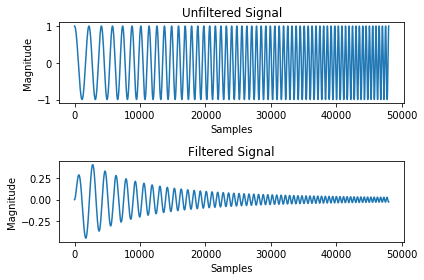

In [5]:
import matplotlib.pyplot as plt #For plotting
from math import sin, pi #For generating input signals
import sys #For reading command line arguments
import scipy.signal as sig
import numpy as np
import math
from scipy.signal import chirp

### Filter - 6KHz->8Khz Bandpass Filter
### @param [in] input - input unfiltered signal
### @param [out] output - output filtered signal
def filter(x , coefb, coefa,Exponent):
    y = [0]
    for n in range(0, len(x)):
        y.append(coefa[0]*y[n]/(2**Exponent))
        for m in range(len(coefb)):
            y[n] = y[n] +  (coefb[m]*x[n-m] -(coefa[m]*y[n-m]))/(2**Exponent)
        #y[n] = (coefb[0]*x[n] + coefb[1]*x[n-1]+  coefb[2]*x[n-2] -(coefa[1]*y[n-1] + coefa[2]*y[n-2]))/(2**Exponent)
    return y

###Read in desired frequency from command line
#frequency = int(sys.argv[1])
frequency = 100



## Create the filter
Fs = 48000           #Sample Frequ
samples = 48000       #Number of Samples
f = 100             #Sig gen Frequ
n = 2               #Order of Filter
rs = 30             #only for Cheby
fc = 20            #Cut Frequ
w_c = 2*fc/Fs       #Digital Frequ -> 0 - 0.5
#Exp = 20
Type = "int32"      #Type of the internal calc

###Find the smallest possible Exponent out of coefa and coefb ###########
def minExp (lista,listb,maxsize):
    if maxsize == "int16":
        maxsize = 16
    elif maxsize == "int32":
        maxsize = 32
    elif maxsize == "int64":
        maxsize = 64
    else:
        raise TypeError("The Exponent must be an Integer")
    lista =  [abs(ele) for ele in lista]                            #Generates a List of absolute Values
    listb =  [abs(ele) for ele in listb]                            #Generates a List of absolute Values
    minall = min(min(lista), min(listb))                            #find the minimum of the two new lists
    maxall = max(max(lista), max(listb))                            #find the maximum of the two new lists
    Expmin = int(round(0.49 + math.log(1/minall, 2)))               #find the minimum Exponent
    Expmax = int(round(math.log((2**(maxsize-1))/maxall, 2)))       #find the maximum Exponent
    print(print("Expmin = \n", Expmin))
    print(print("Expmax = \n", Expmax))
    if Expmin > Expmax:
        raise OverflowError("Filter is not possible, enlarge the internal Register or define the specs in another way")
    return Expmin,Expmax                                            #return this two found Exponents
#########################################################################

###Used to do test for the needed Exponent##############################
def Multiplyer (coefa,coefb,Exponent):
    print(coefa,coefb)
    for c in range(len(coefa)):
        coefa[c] = np.int(coefa[c]*2**Exponent)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    coefa = coefa.astype(Type)
    print(coefa)
    for c in range(len(coefb)):
        coefb[c] = int(coefb[c]*2**Exponent)        #Takes the Coeficients an multiplys it with 2**Exp then cuts the fract bits
    coefb = coefb.astype(Type)
    print(coefb)
    return coefa,coefb
########################################################################


[coefb,coefa] = sig.iirfilter(n,w_c ,0,rs, btype="lowpass", analog=False, ftype="butter")
Expmin,Expmax = minExp(coefa,coefb,Type)
[coefa,coefb] = Multiplyer(coefa,coefb,Expmin)





### Create empty arrays
input = [0]*samples
output = [0]*samples

### Fill array with xxxHz signal
#for i in range(samples):
    #input[i] = int((2**Expmin)*sin(2 * pi * frequency * i / samples)) #+ sin(2 * pi * 70 * i / 48000)
      #Scale the input with 2**Exp
input = chirp(t=np.linspace(0, 1, samples), f0=20, f1=100, t1=1, method='linear')*2**Expmin

### Run the signal through the filter

output = filter(input,coefb,coefa,Expmin)

### Grab samples from input and output 
output_section = output[0:48000]
output_section = [i / (2**Expmin) for i in output_section]
input_section = input[0:48000]
input_section = [i / (2**Expmin) for i in input_section]

### Plot the signals for comparison
plt.figure(1)
plt.subplot(211)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Unfiltered Signal')
plt.plot(input_section)
plt.subplot(212)
plt.ylabel('Magnitude')
plt.xlabel('Samples')
plt.title('Filtered Signal')
plt.plot(output_section)
plt.tight_layout()
plt.show()


Result: <br>
This looks like a good interim result to go on in further notebooks.
